<a href="https://colab.research.google.com/github/7ryean/PYTHON/blob/main/matplotlib%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab을 위한 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_origin = pd.read_csv('/D:\바탕화면\2021 BOAZ\멘토멘티 스터디\3차시_matplotlib/fruits.csv', engine = 'python', encoding = 'utf-8-sig')
df = df_origin.copy(); df

FileNotFoundError: ignored

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## BOAZ 시각화 멘토멘티 D조 3주차 (0125) - 시각화

### 1. Series, DataFrame 시각화

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib
import matplotlib.pylab as plt
# pylab이라는 서브패키지가 존재하기 때문에 위와 같이 import 해와야 한다.

%matplotlib inline
# 쥬피터 노트북 화면에 시각화 결과를 볼 수 있도록 해준다.

In [ ]:
plt.rc('font', family='AppleGothic') #맥
#plt.rc('font', family='malgun gothic') #윈도우
plt.rcParams['axes.unicode_minus'] = False
#Matplotlib에서 한글을 사용하려면 다음과 같이 한글 폰트를 적용해야 한다. 당연히 해당 폰트는 컴퓨터에 깔려 있어야 한다. 여기에서는 애플고딕 폰트를 사용한다.

In [ ]:
df_origin = pd.read_csv('./fruits.csv', engine = 'python', encoding = 'utf-8-sig')
df = df_origin.copy(); df

FileNotFoundError: ignored

#### 1) Line Chart : `.plot()`

주로 __시간이 경과함__에 따른 __경향, 트렌드, 변화__를 살펴볼때 사용

<font color='blue'>Pivot Tables
<br><img align="left" src="http://drive.google.com/uc?export=view&id=1HEBp4qq4GaksdQBb2fx2tRsq-gVR-j6d" width=800 height=600>

In [ ]:
df1 = pd.pivot_table(df, index='year', values = 'output', aggfunc=np.mean) #연도별 생산량(output)
display(df1)
display(df1['output']) #DataFrame의 하나의 열은 Series 

,output
year,
2017,9005.75
2018,9100.00
2019,11302.50
2020,11500.00


year
2017     9005.75
2018     9100.00
2019    11302.50
2020    11500.00
Name: output, dtype: float64

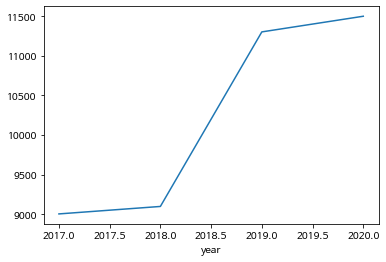

In [ ]:
# Series를 통한 line plot 그리기
df1['output'].plot()

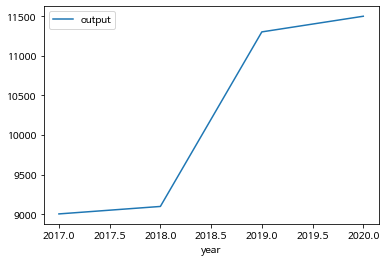

In [ ]:
# DataFrame을 통한 line plot 그리기 1 : 새로운 DataFrame으로 만들어서 그래프 생성
df1.plot()

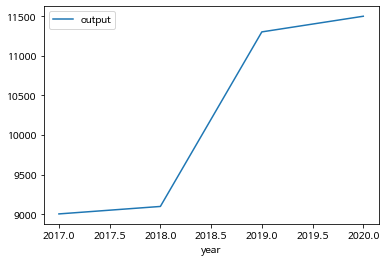

In [ ]:
# DataFrame을 통한 line plot 그리기 2 : pivot_table을 통해 생성하고 바로 그래프 생성
pd.pivot_table(df, index='year', values = 'output', aggfunc=np.mean).plot()

product,배,사과,참외,포도
year,,,,
2017,500,500,1000,1000
2018,600,800,800,900
2019,400,300,500,1200
2020,500,400,600,1000


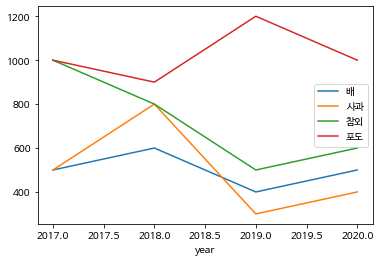

In [ ]:
# DataFrame을 통한 line plot 그리기 3  
display(pd.pivot_table(df, index = 'year', columns = 'product', values = 'price', aggfunc = np.mean))

# 과일별로 연도에 따른 가격 
pd.pivot_table(df, index = 'year', columns = 'product', values = 'price', aggfunc = np.mean).plot()
plt.legend(loc='best') #범례는 최적의 위치에 배치

<font color='blue'>* 범례 (legend)

여러개의 라인 플롯을 동시에 그리는 경우에는 각 선이 무슨 자료를 표시하는지를 보여주기 위해 `legend` 명령으로  범례(legend)를 추가할 수 있다.<br> __범례의 위치__는 자동으로 정해지지만 수동으로 설정하고 싶으면 `loc` 인수를 사용한다. 인수에는 문자열 혹은 숫자가 들어가며 가능한 코드는 다음과 같다.

plt.legend(loc='___문자열___ ')

[  ___문자열___ 에 들어갈 텍스트  ]<br>

| loc 문자열 | 숫자 |
|-|-|
| `best` |  0 | 
| `upper right` |  1 | 
| `upper left` |  2 | 
| `lower left` |  3 | 
| `lower right` |  4 | 
| `right` |  5 | 
| `center left` |  6 | 
| `center right` |  7 | 
| `lower center` |  8 | 
| `upper center` |  9 | 
| `center` |  10 | 



#### 2) Bar Chart : ` .plot(kind='bar) `  ` .plot(kind='barh')`

주로 범주별로 __비교하고 순위__를 매길 때 사용

product
포도     7500.00
사과    10250.00
참외    11000.00
배     12158.25
Name: output, dtype: float64

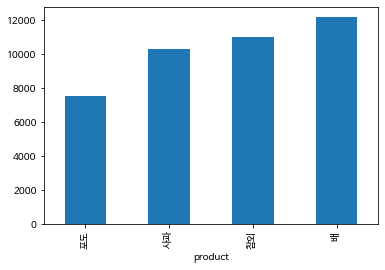

In [ ]:
# Series를 통한 Bar Chart 만들기
display(df.groupby('product')['output'].mean().sort_values())

# 과일별 생산량(output)
df.groupby('product')['output'].mean().sort_values().plot(kind='bar')

,price
product,
배,500
사과,500
참외,725
포도,1025


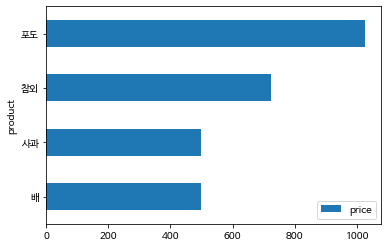

In [ ]:
#DataFrame을 통한 가로방향 Bar Chart만들기
display(pd.pivot_table(df, index = 'product', values = 'price', aggfunc=np.mean))

# 과일별 가격
pd.pivot_table(df, index = 'product', values = 'price', aggfunc=np.mean).plot(kind='barh') #가로로 막대차트

year,2017,2018,2019,2020
product,,,,
배,500,600,400,500
사과,500,800,300,400
참외,1000,800,500,600
포도,1000,900,1200,1000


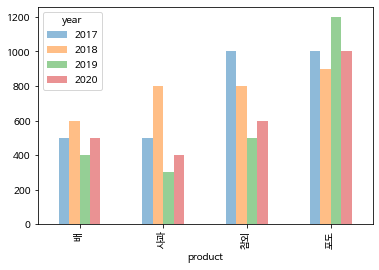

In [ ]:
# 과일별로 연도별 가격 
display(pd.pivot_table(df, index = 'product',columns = 'year', values = 'price', aggfunc=np.mean))

pd.pivot_table(df, index = 'product',columns = 'year', values = 'price', aggfunc=np.mean).plot(kind='bar',alpha=0.5)

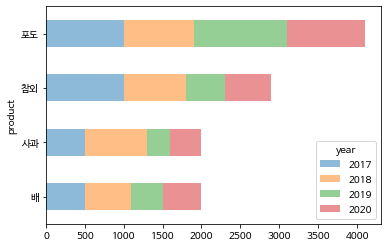

In [ ]:
# 과일별로 연도별 가격 2
pd.pivot_table(df, index = 'product',columns = 'year', values = 'price', aggfunc=np.mean).plot(kind='barh', stacked= True,alpha=0.5)

위와 같이 __stacked = True__로 설정하면, 하나의 인덱스에 대한 각 열의 값을 한줄로 쌓아서 나타내준다.

#### 3) Histogram : ` .hist()`  ` .plot(kind='hist)`

연속형 자료를 계급으로 나누어 계급별 도수(빈도수)를 막대로 나타낸 그래프<br>
주로 전체 집단의 __분포 상태를 파악하거나 비교__할때 사용

<font color='blue'>* 막대그래프와 히스토그램의 차이점! <br>
<font color='black'>막대그래프의 x축은 범주형, 이산형 변수이고, 히스토그램의 x축은 연속형 변수이다. <br>
그래서 막대그래프는 막대와 막대가 서로 떨어져있지만, 히스토그램은 공백없이 서로 붙어있다.

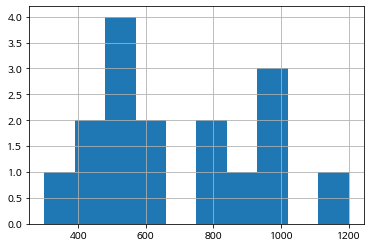

In [ ]:
#Series를 통한 Historgram 나타내기
df['price'].hist() # 가격의 분포 확인 가능

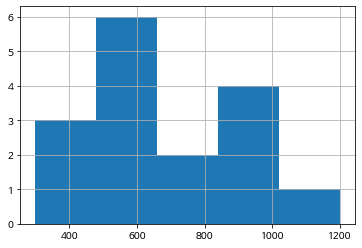

In [ ]:
df['price'].hist(bins = 5) #x축의 구간의 개수를 5개로 설정

__bins = 숫자__ : x축의 구간 개수를 설정

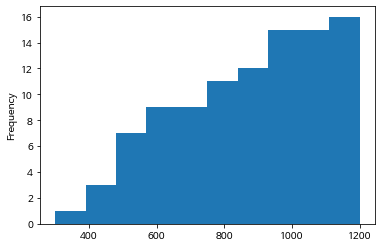

In [ ]:
# 가격(price)의 분포를 누적 히스토그램으로 확인
df['price'].plot(kind='hist',cumulative=True) 
#normed 는 정규화를해서 y축이 0에서 1이되는거 , cumulative는 누적화

__normed=True__ : 각 구간에 속하는 개수를 전체 개수로 나눈 비율, 즉 정규화한 값을 Bar의 높이로 사용하게 된다.<br>
__cumulative=True__ : 누적 히스토그램으로 생성


#### 4) Box Plot : `.plot(kind='box)`

<font color='blue'>box plot 개념
<br><img align="left" src="https://t1.daumcdn.net/cfile/tistory/2532913754A7F38938" width=400 height=300>
<font color='black'>1) 중앙값(median): 말그대로 중앙값 50%의 위치이다.
   중앙 값은 짝수일 경우 2개가 될 수도 있고, 그것의 평균이 중앙값이 될 수도 있다.
   홀수일 경우, 중앙값은 1개가 된다.

2) 박스(Box): 25%(Q1) ~75%(Q3) 까지 값들을 박스로 둘러 쌓는다.

3) 수염 (whiskers): 박스의 각 모서리 (Q1, Q3)로 부터 IQR의 1.5배 내에 있는 가장 멀리 떨어진 데이터 점까지 이어져 있는 것이 수염이다.

4) 이상치(Outlier): 수염(whiskers)보다 바깥쪽에 데이터가 존재한다면, 이것은 이상치로 분류 된다.



* Inter Quartile range (IQR) 이란?
Q3 - Q1의 값이다.

이상치를 구하기 위해서는 결국 수염을 이용하게 되는데, 이때 보통 1.5를 IQR에 곱한것으로 구한 수염을 이용한다.

product
포도     7500.00
사과    10250.00
참외    11000.00
배     12158.25
Name: output, dtype: float64

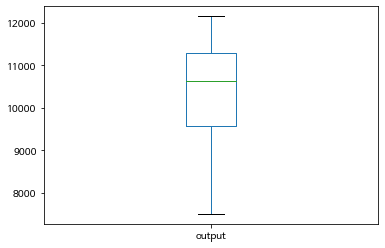

In [ ]:
# 과일별 생산량
display(df.groupby('product')['output'].mean().sort_values())

# 생산량의 과일별 분포를 BoxPlot으로 확인
df.groupby('product')['output'].mean().sort_values().plot(kind='box')

year,2017,2018,2019,2020
product,,,,
배,10023,9400,13210,16000
사과,10000,8000,13000,10000
참외,9000,10000,13000,12000
포도,7000,9000,6000,8000


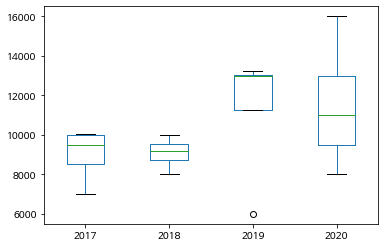

In [ ]:
# 연도에 따른 과일별 생산량의 분포를 Box Plot을 통해 확인
display(pd.pivot_table(df, index = 'product',columns = 'year', values = 'output', aggfunc=np.mean))

pd.pivot_table(df, index = 'product',columns = 'year', values = 'output', aggfunc=np.mean).plot(kind='box')

,product,year,output,price
4,포도,2017,7000,1000
5,포도,2018,9000,900
6,포도,2019,6000,1200
7,포도,2020,8000,1000


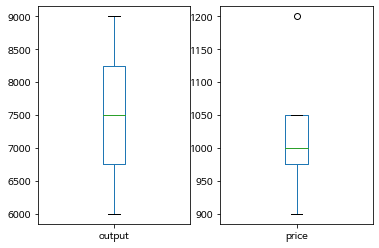

In [ ]:
#subplot으로 분리하여 포도의 생산량과 가격의 분포를 확인
display(df.loc[df['product']=='포도'])

fig, axes = plt.subplots(nrows = 1, ncols =2)
df.loc[df['product']=='포도'].plot(ax=axes[0], y='output', kind = 'box') #ax=axes[0] 첫번째
df.loc[df['product']=='포도'].plot(ax=axes[1], y='price', kind = 'box')

### 2. Matplotlib 

Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다.
Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능을 제공한다.

* 선 그래프(line chart)
* 막대 그래프(bar chart)
* 파이 차트(pie chart)
* 히스토그램(histogram)
* 스캐터 플롯(scatter plot)

그리고 matplotlib를 이용하면 numpy나 pandas에서 사용되는 자료구조를 쉽게 시각화할 수 있다.

Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib 갤러리 웹사이트를 방문한다.

* http://matplotlib.org/gallery.html

**Plot**

Plot이란, 그래픽으로 렌더링하여 화면으로 출력하기 전 데이터를 가상의 공간에 미리 그려놓는 것. 이 plot은 실제로 차트를 그리는 것이 아닌 내부적으로 그릴 준비를 하는 것이므로 최종적으로는 plt.show()를 해야 시각화 된 차트가 보입니다.

#### 1) Line Chart : `  plt.plot()`

2차원 데이터(XY값)를 기준으로 선이 이어지게 시각화한다.

> **plt.plot**
기본적으로 plot(x,y) 순서로 2개의 리스트를 넣어주지만 만약 하나의 리스트만 넣을 경우 x는 자동적으로 0부터 할당됩니다.

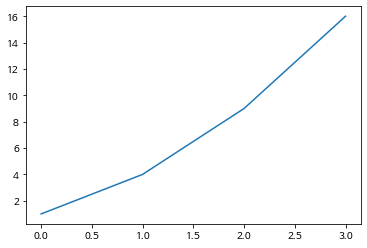

In [ ]:
plt.plot([1, 4, 9, 16])
plt.show() 
# show()를 하지 않으면 차트가 나오기는 하지만 차트의 정보도 같이 나옴.

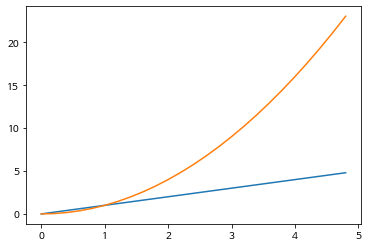

In [ ]:
#중복 데이터 그리기
#하나의 plot에 그리기
t = np.arange(0., 5., 0.2)
plt.plot(t, t, t, t**2) 
plt.show()

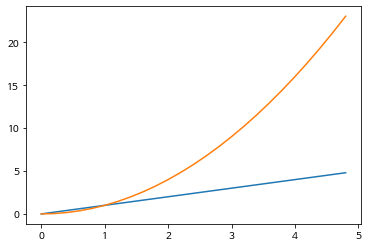

In [ ]:
#두 개의 라인차트 그리기
#여러번 plot 사용하기
plt.plot(t, t)
plt.plot(t, t**2)
plt.show()

같은 plot()으로 x축은 공유하되, y축의 스케일을 다르게 하고 싶을 때는 twinx() 를 이용합니다. 1번째 plot()은 차트 왼쪽에 y축 스케일이, 2번째 plot()은 우측에 y축 스케일이 보이는 것을 확인하실 수 있습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


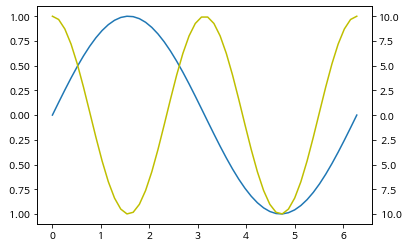

In [ ]:
x = np.linspace(0, 2*np.pi, 50)

ax1 = plt.gca()
ax2 = plt.gca().twinx()

ax1.plot(x, np.sin(x))
ax2.plot(x, 10*np.cos(2*x), color='y')

plt.show()

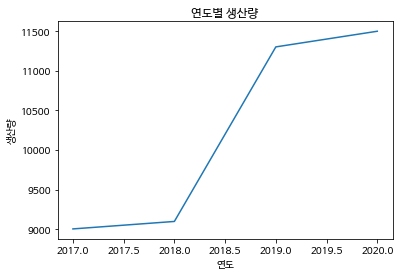

In [ ]:
#DataFrame을 이용하여 LineChart 그리기
plt.plot(df1['output']) 
plt.title("연도별 생산량") # 제목
plt.xlabel("연도") # x축 이름
plt.ylabel('생산량') # y축 이름
plt.show()

product,배,사과,참외,포도
year,,,,
2017,500,500,1000,1000
2018,600,800,800,900
2019,400,300,500,1200
2020,500,400,600,1000


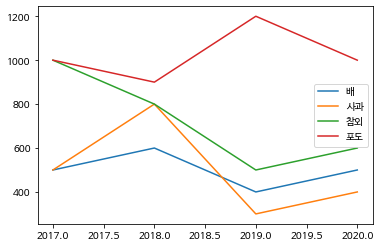

In [ ]:
# 과일별 연도에 따른 가격 비교 
df2 = pd.pivot_table(df, index = 'year', columns = 'product', values = 'price', aggfunc = np.mean)
display(df2)

plt.plot(df2)
plt.legend(df2.columns, loc = 'best') #범례지정 및 위치 조정
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


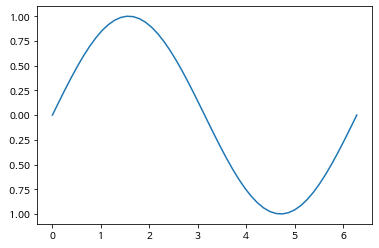

In [ ]:
#Line plot을 이용하면 y=sin(x) 와 같은 수학 그래프도 쉽게 그릴 수 있습니다
# np.linspace()는 0 ~ 2*PI 사이의 값을 50등분한 값을 생성합니다.
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

plt.plot(x, y)
plt.show()

**Subplot, 차트를 여러개로 나누기**

이번에는 하나의 차트에 여러 데이터를 중복해서 그리는 것이 아니라, 하나의 이미지에서 여러 부분으로 나누어 각각의 차트를 만들 수도 있습니다. 이것은 subplot()을 이용합니다. 세 가지(nrows, ncols, index)를 입력을 받으면 nrows는 행의 개수, ncols는 열의 개수, index는 보여줄 위치로 1부터 지정하고 왼쪽 위부터 오른쪽 아래로 하나씩 지정됩니다. 세 개의 인수 (2,2,3)을 넣고 싶다면 숫자 223을 넣어도 동작합니다.

* subplot(nrows, ncols, index): 행의 개수, 열의 개수, 차트 위치 순으로 입력
* subplot(3digit int): 3자리 숫자로, 행/열/위치를 한번에 설정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


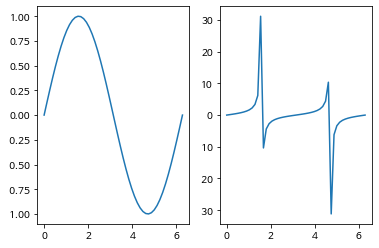

In [ ]:
x1 = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x1)

x2 = np.linspace(0.0, 2*np.pi, 50)
y2 = np.tan(x2)

# 1x2구간으로 나누고 1번째에 그리기
plt.subplot(1, 2, 1)
plt.plot(x1, y1)

# 1x2구간으로 나누고 2번째에 그리기
plt.subplot(1, 2, 2)
plt.plot(x2, y2)

plt.show()

subplot()을 4가지 영역으로 나눠서 표현하는 예제입니다. 입력값을 편하게 하기 위해서 (2, 2, 3) 대신 223을 넣어도 됩니다.
> .cumsum()은 누적합 데이터를 생성합니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


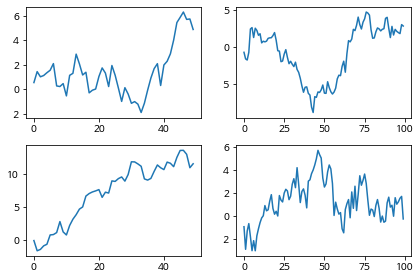

In [ ]:
import numpy.random as npr

y1 = npr.normal(size = 50).cumsum()
y2 = npr.normal(size = 100).cumsum()
y3 = npr.normal(size = 50).cumsum()
y4 = npr.normal(size = 100).cumsum()

plt.subplot(2, 2, 1)
plt.plot(y1)

# same as plt.subplot(222)
plt.subplot(2, 2, 2)
plt.plot(y2)

# same as plt.subplot(2,2,3)
plt.subplot(223)
plt.plot(y3)

plt.subplot(224)
plt.plot(y4)

plt.tight_layout()
plt.show()

#### 2) Bar Chart  :` plt.bar()` , `plt.barh()`

plt.bar()를 이용하여 히스토그램과 비슷한 형식의 막대 그래프를 만들 수 있습니다

.hist()는 연속적인 데이터를 표현하고 .bar()는 카테고리를 나눌 수 있는 데이터를 표현합니다. .barh() 를 이용하면 가로 막대 형식으로 출력할 수 있습니다.

* .bar() : 세로 막대 차트
* .barh() : 가로 막대 차트

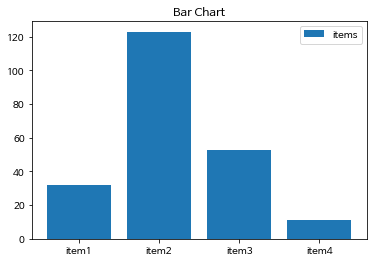

In [ ]:
x = ['item1', 'item2', 'item3', 'item4']
y = [32, 123, 53, 11]

plt.bar(x,y)

plt.title('Bar Chart')
plt.legend(['items'])
plt.show()

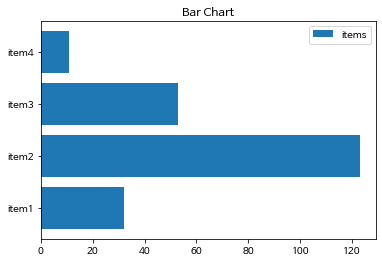

In [ ]:
x = ['item1', 'item2', 'item3', 'item4']
y = [32, 123, 53, 11]

plt.barh(x,y)

plt.title('Bar Chart')
plt.legend(['items'])
plt.show()

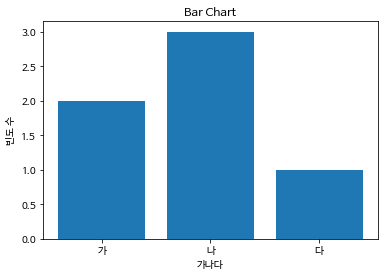

In [ ]:
y = [2, 3, 1]
x = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

,price
product,
배,500
사과,500
참외,725
포도,1025


<BarContainer object of 4 artists>

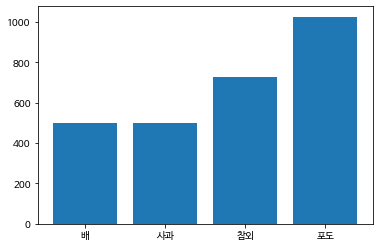

In [ ]:
# 과일별 가격
df3 = pd.pivot_table(df, index = 'product', values = 'price', aggfunc=np.mean)
display(df3)

plt.bar(x=df3.index.values, height=df3['price']) 
# bar chart에서는 x, height 지정해주기!

<BarContainer object of 4 artists>

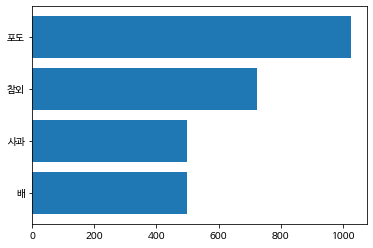

In [ ]:
# 가로방향 막대그래프
# 세로방향과 달리 y와 width를 지정
plt.barh(y=df3.index, width=df3['price'])

#### 3) Histogram  : `plt.hist()`

plt.hist()를 통하여 히스토그램을 그릴 수 있습니다. 히스토그램은 연속적인 데이터를 막대그래프로 나타냅니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


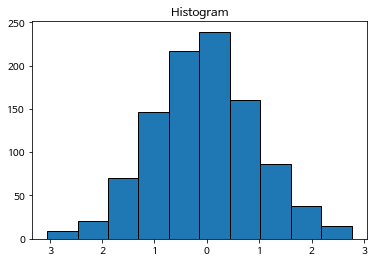

In [ ]:
np.random.seed(0)
x = np.random.randn(1000) # 가우시안 표준 정규분포를 따르는 난수 발생
plt.title("Histogram")
plt.hist(x, bins=10, edgecolor='black') #외곽선 그림
plt.show()

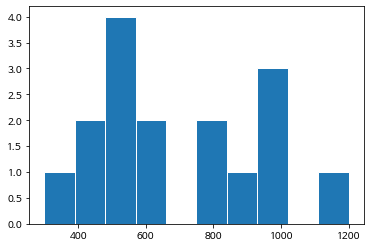

In [ ]:
# 가격의 분포
plt.hist(df['price'], edgecolor='w')
plt.show()

#### 4) Pie Chart :`plt.pie()`

plt.pie()를 이용하여 파이 모양의 차트를 표현할 수 있습니다.

자주 사용하는 옵션 2가지만 소개하겠습니다. autopct은 각 파이 각각에 문자열을 출력하는 것인데 예제에서 ‘%.2f’는 소수점 두번째만 출력하라는 의미이고 ‘%%’는 문자 ‘%’를 표현하는 것입니다. explode는 보통 강조할 때 쓰이는 것으로 리스트를 입력하면 각 파이가 떨어진 정도를 나타낼 수 있습니다.

* autopct : 각 파이 문자열 출력 형식 설정
* explode : 각 파이를 분리하여 표현하는 정도

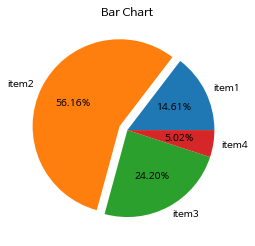

In [ ]:
x = ['item1', 'item2', 'item3', 'item4']
y = [32, 123, 53, 11]

plt.pie(y, labels=x, autopct='%.2f%%', explode=(0, 0.1, 0, 0))

plt.title('Bar Chart')
plt.show()

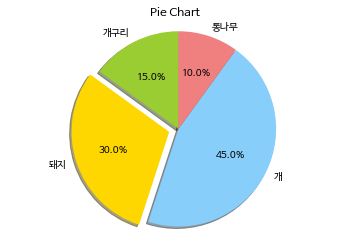

In [ ]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) # 어떤 조각을 튀어나오게 설정하는 것(2번째 조각)

plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90) #startangle=90 12시방향에서 시작해!
# 1.1f% : 실수를 찍는데 소수점 한자리까지 표현 (두자리면 %2.2f%%)
plt.axis('equal') # 해당 코드를 실행해주지 않으면 가끔씩 원의 형태를 유지하지 못하는 경우가 있다.
plt.show()

#### 5) Scatter Plot : `plt.scatter()`

__데이터의 분포__를 살펴보면서 서로 다른 두개의 변수 간의 __상관성__을 파악할 수 있음<br>
보통 수치형 변수 간의 상관관계를 살펴는데 사용

plt.scatter()를 이용하여 2차원 상에서 점을 차트를 표현할 수 있습니다

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


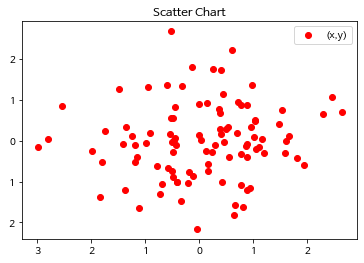

In [ ]:
x = npr.normal(size=100)
y = npr.normal(size=100)

plt.scatter(x,y, c='red')

plt.title('Scatter Chart')
plt.legend(['(x,y)'])
plt.show()

plt.scatter() 에서 점의 반지름을 설정할 수 있습니다. 그렇게 되면 3차원의 데이터 형식을 표현할 수 있게 됩니다. 이를 ‘Bubble Chart’라고 부르기도 합니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


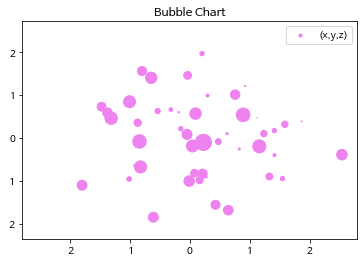

In [ ]:
x = npr.normal(size=100)
y = npr.normal(size=100)
z= npr.normal(size=100)*100

plt.scatter(x,y,z, c='violet')

plt.title('Bubble Chart')
plt.legend(['(x,y,z)'])
plt.show()

In [ ]:
a = ['Korea', 'China', 'Japan', 'USA', 'Germany']
b = [0.4, 0.6, -0.1, 0.8, -0.2]
c = [-1.4, 0.8, -3.4, 3.9, 9.4]
d = [330, 2096, 1184, 4253, 961]
e = ['r','g','b','y','c']

df_new= pd.DataFrame({
    'country': a,
    'population_growth': b,
    'export_increase': c,
    'GDP_size': d,
    'color': e
});df_new

,country,population_growth,export_increase,GDP_size,color
0,Korea,0.4,-1.4,330,r
1,China,0.6,0.8,2096,g
2,Japan,-0.1,-3.4,1184,b
3,USA,0.8,3.9,4253,y
4,Germany,-0.2,9.4,961,c


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


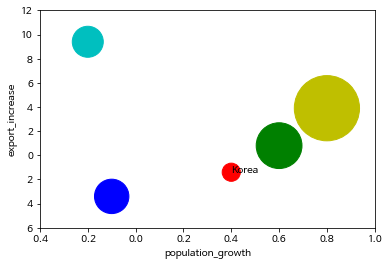

In [ ]:
plt.scatter(df_new.population_growth, df_new.export_increase, s=df_new.GDP_size, c=df_new.color)
plt.text(df_new.iloc[0,1],df_new.iloc[0,2],df_new.iloc[0,0]) #(x좌표, y좌표, text)
plt.xlim(-0.4,1) # x축의 범위 지정
plt.ylim(-6,12) # y축의 범위 지정
plt.xlabel('population_growth')
plt.ylabel('export_increase')
plt.show()

Text(0, 0.5, '가격')

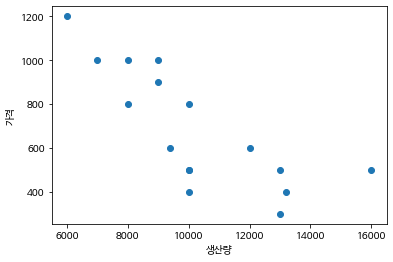

In [ ]:
plt.scatter(df['output'], df['price'])
plt.xlabel('생산량')
plt.ylabel('가격')

### **ColorMap**

plt.imshow()를 이용하면 행과 열로 표현된 2D 데이터를 각 수치 정도에 따라 색으로 표현할 수 있습니다. 다시 말하면 이미지화 시키는 것을 말합니다.

[[ 0.00067634 -0.00463022  0.00447024  0.0010572   0.00027762 -0.00425542
   0.01421976  0.00456363 -0.00528671 -0.00108004]
 [-0.00740867 -0.00608291 -0.00640726 -0.01134312  0.00777277 -0.00291041
   0.00554128 -0.00670126 -0.00060362 -0.00711041]
 [ 0.00719668 -0.00248419 -0.00730874 -0.01641703  0.00275667 -0.00708385
  -0.00015779 -0.0049173   0.0095419   0.00544145]
 [ 0.00447212 -0.00616121  0.0046629   0.01714832 -0.00832186  0.00172339
  -0.01649217  0.01398562 -0.00397912  0.00782579]
 [-0.01723228  0.01797539 -0.00356872  0.00545657  0.00150818 -0.00255471
   0.01685792 -0.01648046  0.00298714  0.00910646]
 [-0.00029856 -0.00118171 -0.00142688 -0.01227636  0.00038127  0.00512718
   0.00068599 -0.00272276 -0.00489725 -0.00279297]
 [ 0.01257744 -0.02086635  0.00040071 -0.00327755  0.01455808  0.00055492
   0.01484926 -0.0212389   0.00459585  0.00280058]
 [ 0.01390534 -0.01641349 -0.00155036  0.0006606  -0.00495795  0.01216578
  -0.00338682  0.02034763  0.01054178  0.00950834]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


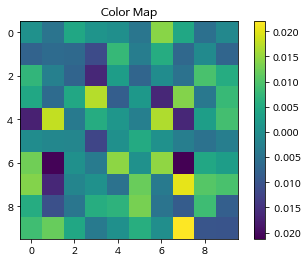

In [ ]:
x = npr.normal(size = 100).reshape(10, 10) / 100
print(x)

# [[-0.0158119   0.0008522   0.01655042 -0.00064181  0.01636717 -0.00431618
#   -0.00923994  0.00524193 -0.00141358 -0.00023031]
#   [ 0.0016493  -0.0001559   0.01560591  0.01966844  0.01251797 -0.01903377
#     0.00532141  0.0069562   0.01258736  0.00230315]
#   [ 0.01667079 -0.00875421 -0.00204732 -0.00342779  0.01002274  0.00358062
#     0.0012052   0.00320403  0.00276938  0.00489377]
#   [-0.01962862 -0.01302604  0.00774131 -0.01036093 -0.00331815  0.00068648
#     0.00182531 -0.0036629   0.00545105  0.00185453]
#   [ 0.00072316  0.021296   -0.0099748  -0.01951083 -0.02903795 -0.01822232
#     0.00862724 -0.01246434 -0.01157945  0.01329665]
#   [ 0.00641971  0.01705669  0.00098373 -0.0066299  -0.00908504 -0.01359947
#   -0.00071791 -0.00886265 -0.0021053  -0.00093484]
#   [-0.01116248 -0.00283873 -0.01351742 -0.00746876  0.01435057 -0.00149578
#   -0.01902301 -0.02355377 -0.0020175   0.0046488 ]
#   [-0.00733449 -0.01572126  0.01201231 -0.01953659  0.01178389 -0.02817181
#     0.00963386  0.00599131  0.00295523 -0.00533833]
#   [ 0.00467253 -0.01102508 -0.01272875  0.02023078 -0.01444144 -0.00363434
#     0.00590492 -0.0093903  -0.00711697  0.00442914]
#   [-0.00622509  0.00496323 -0.00268984  0.01460282 -0.00498456  0.02567855
#   -0.00786389 -0.00354781  0.00212546 -0.01473025]]

plt.imshow(x)
plt.colorbar()

plt.title('Color Map')
plt.show()

matplotlib.image의 imread()를 이용하여 실제 이미지 파일을 읽어왔습니다. 여러분이 가지고 있는 다양한 이미지 파일을 똑같이 읽어올 수 있습니다. 이미지 데이터를 그대로 imshow()를 이용하여 시각화하면 이미지가 됩니다. cmap = 'gray'로 흑백 시각화를 하였습니다.

[[[208 207 203]
  [209 208 204]
  [210 209 205]
  ...
  [204 203 199]
  [206 205 201]
  [208 207 203]]

 [[209 208 204]
  [209 208 204]
  [210 209 205]
  ...
  [207 206 202]
  [209 208 204]
  [211 210 206]]

 [[209 208 204]
  [209 208 204]
  [210 209 205]
  ...
  [208 207 203]
  [209 208 204]
  [209 208 204]]

 ...

 [[ 26  26  26]
  [ 29  29  29]
  [ 33  33  33]
  ...
  [170 169 167]
  [169 168 166]
  [166 165 163]]

 [[ 26  26  26]
  [ 29  29  29]
  [ 32  32  32]
  ...
  [171 170 168]
  [169 168 166]
  [167 166 164]]

 [[ 26  26  26]
  [ 29  29  29]
  [ 32  32  32]
  ...
  [168 167 165]
  [165 164 162]
  [162 161 159]]]


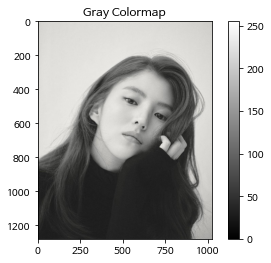

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/BOAZ 멘토멘티 D조/3_matplotlib 시각화/sohee.jpg')
x = img
print(x)

# [[ 88  88  89 ...  62  61  61]
#  [ 88  88  89 ...  62  61  61]
#  [ 89  89  90 ...  61  61  61]
#  ...
#  [145 145 145 ... 104 103 103]
#  [142 144 148 ... 104 103 103]
#  [142 146 152 ... 104 103 103]]

plt.imshow(x, cmap='gray')

plt.colorbar()
plt.title('Gray Colormap')
plt.show()

### **Axes3D**

Axes3D 패키지를 이용하여 axes를 3차원 공간으로 생성할 수도 있습니다.

자세한 내용은 Axes3D를 확인하세요.

아래 예제는 plot_surface()를 이용하여 3D 형태의 표면을 생성하여 입체도형을 만들었습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


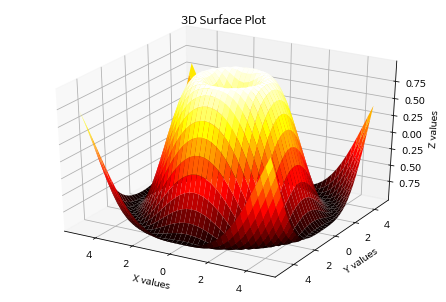

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap='hot')

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Z values')
plt.title("3D Surface Plot")
plt.show()

아래 예제는 2차원 공간에 scatter()를 사용한 것처럼 Axes3D 공간에 scatter()를 생성한 모습입니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


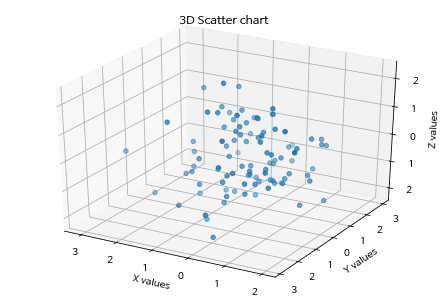

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X = npr.normal(size = 100)
Y = npr.normal(size = 100)
Z = npr.normal(size = 100)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='o')

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Z values')
plt.title('3D Scatter chart')
plt.show()

### 3. Matplotlib 시각화의 구조와 그래프 스타일 지정

#### 3-1. Matplotlib 시각화의 구조

Matplotlib가 그리는 그림은 Figure 객체, Axes 객체, Axis 객체 등으로 구성된다. Figure 객체는 한 개 이상의  Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함한다.  다음 그림은 이 구조를 설명하고 있다.

<img src="https://datascienceschool.net/upfiles/4e20efe6352e4f4fac65c26cb660f522.png" style="width: 80%">
<img src="https://matplotlib.org/_images/anatomy.png" style="width: 70%">

Figure는 그림이 그려지는 캔버스나 종이를 뜻하고 Axes는 하나의 플롯, 그리고 Axis는 가로축이나 세로축 등의 축을 뜻한다. Axes와 Axis의 철자에 주의한다.

#### 3-2. 스타일 지정

plot()에 보기가 편하도록 여러가지 스타일을 정해줄 수도 있습니다. 점의 색깔(Color), 점의 모양(Markers), 선 스타일(Line style)를 문자열로 쉽게 지정할 수도 있습니다. 위 순서대로 각 약자로 지정하고, 이 중 생략된 것은 디폴트값이 적용됩니다.

| 스타일 문자열 | 약자 | 의미 |
|-|-|-|
| `color` | `c`  | 선 색깔 |
| `linewidth` | `lw` | 선 굵기 |
| `linestyle` | `ls` | 선 스타일 |
| `marker` |  ` ` | 마커 종류 |
| `markersize` | `ms`  | 마커 크기 |
| `markeredgecolor` | `mec`   |	마커 선 색깔 |
| `markeredgewidth` | `mew`   |	마커 선 굵기 |
| `markerfacecolor` | `mfc`   |	마커 내부 색깔 |

* 색깔  

색깔을 지정하는 방법은 __색 이름__ 혹은 __약자__를 사용하거나 `#` 문자로 시작되는 __RGB코드__를 사용한다.
<br><img align="left" src="https://matplotlib.org/_images/named_colors.png" alt="matplotlib color">

* 선 스타일   

선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit) 이 있다. 지정 문자열은 다음과 같다.

| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

* 마커  

데이터 위치를 나타내는 기호를 마커(marker)라고 한다. 마커의 종류는 다음과 같다.

| 마커 문자열 | 의미 |
|-|-|
| `.` | point marker  |
| `,` | pixel marker |
| `o` | circle marker |
| `v` | triangle_down marker |
| `^` | triangle_up marker |
| `<` | triangle_left marker |
| `>` | triangle_right marker |
| `1` | tri_down marker |
| `2` | tri_up marker |
| `3` | tri_left marker |
| `4` | tri_right marker |
| `s` | square marker |
| `p` | pentagon marker |
| `*` | star marker |
| `h` | hexagon1 marker |
| `H` | hexagon2 marker |
| `+` | plus marker |
| `x` | x marker |
| `D` | diamond marker |
| `d` | thin_diamond marker |

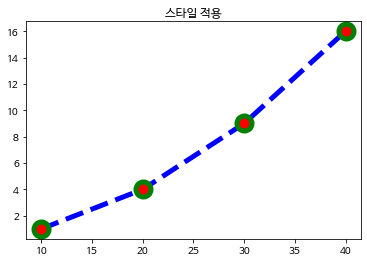

In [ ]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title("스타일 적용")
plt.show()
# 선 색상(b), 선 굵기(5), 선 스타일(점선)
# 마커(o), 마커 크기(15), 마커 윤곽선 색상(g), 마커 윤곽선 크기(5), 마커 색상(r)

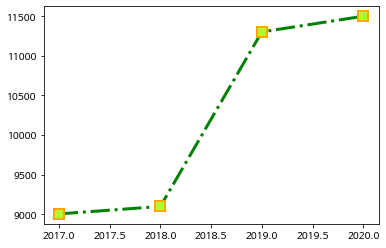

In [ ]:
plt.plot(df1['output'], c='g', lw=3, ls='-.', marker='s', ms=10, mec='orange', mew=2, mfc='greenyellow')
# 선 색상(green), 선 굵기 (3), 선 모양(점과 선 혼합), 마커모양(네모), 
# 마커크기(10), 마커선 색상(주황), 마커선 굵기(2), 마커 색(greenyellow)
plt.show()

**차트의 범례 그리기**

legend()를 이용하여 각 데이터가 무엇인지 설명해주는 Legend(범례)를 넣을 수도 있습니다.

* legend() : 차트에 각 데이터의 설명 추가

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


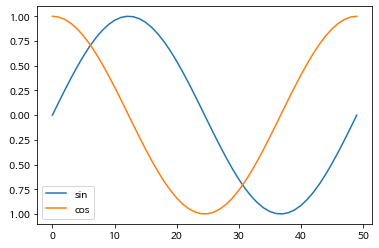

In [ ]:
x = np.linspace(0, 2*np.pi, 50)

plt.plot(np.sin(x), label='sin')
plt.plot(np.cos(x), label='cos')
plt.legend()

plt.show()

plot()안에 label 값으로 legend를 넣지 않고 legend() 안에 리스트 형식으로 순서대로 넣어도 동일한 결과를 나타납니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


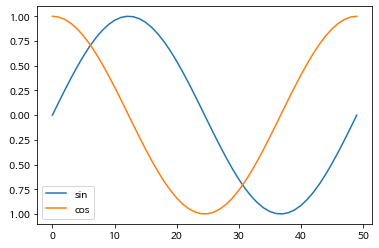

In [ ]:
x = np.linspace(0, 2*np.pi, 50)

plt.plot(np.sin(x))
plt.plot(np.cos(x))
plt.legend(['sin', 'cos'])

plt.show()

**Title and Axis Label, 차트 및 축 이름 설정하기**

title()을 통해 차트의 이름(Title)을 입력할 수 있고, xlabel(), ylabel()을 통해 각 축의 이름(Label)을 넣을 수도 있습니다.

* .title() : 차트의 제목 설정
* .xlabel() : x축의 이름 설정
* .ylabel() : y축의 이름 설정

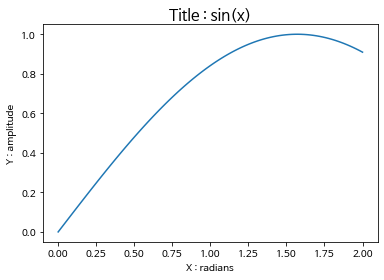

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, np.sin(x))
plt.title('Title : sin(x)', fontsize=15)
plt.xlabel('X : radians')
plt.ylabel('Y : amplitude')

plt.show()

**Grid, 그리드 설정**

plt.grid()를 통해 차트의 배경을 Grid 형식으로 라인을 그려줄 수도 있습니다. .show() 대신 .grid()로 차트를 출력하면 됩니다.

* .grid() : 차트에 Grid 표시

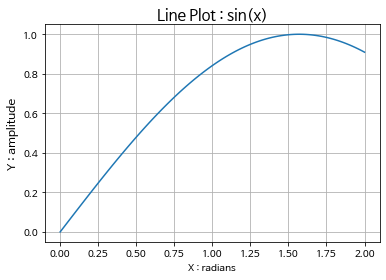

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, np.sin(x))
plt.title('Line Plot : sin(x)', fontsize = 15)
plt.xlabel('X : radians')
plt.ylabel('Y : amplitude', fontsize='large')

plt.grid()

**차트 범위 지정**

기본적으로 차트에 그려질 x, y 범위에 따라 자동으로 차트의 스케일이 정해지는데, xlim(), ylim()을 이용하여 스케일을 원하는 범위로 설정할 수 있습니다.

* xlim() : x축 범위 설정
* ylim() : y축 범위 설정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


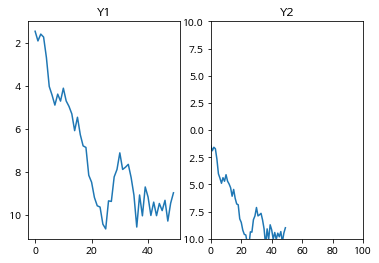

In [ ]:
y1 = npr.normal(size = 50).cumsum()

# (왼쪽) default xlim, ylim
plt.subplot(121)
plt.plot(y1)
plt.title('Y1')

# (오른쪽) xlim, ylim 사용자 설정
plt.subplot(122)
plt.plot(y1)
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.title('Y2')

plt.show()

**Errorbar, 선에 에러바(오차막대) 표기**

plt.plot() 대신 plt.errorbar()를 사용하면 Line Plot의 각 포인트에 errorbar를 넣을 수 있습니다.

* .errorbar(x, y, yerr, xerr): plot(x,y) 내부 각 포인트에 yerr크기의 세로선, xerr 크기의 가로선

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


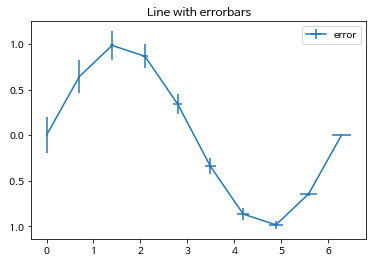

In [ ]:
# Plot with Error bars
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xerr = np.linspace(0, 1, 10) / 5
yerr = np.linspace(1, 0, 10) / 5

plt.errorbar(x, y, yerr, xerr)

plt.title('Line with errorbars')
plt.legend(['error'])
plt.show()

errorbar() 안에 입력 값으로 uplims, lolims 값 설정을 통해 화살표 형식으로 표기할 수도 있습니다.

* uplims : 아래로 향하는 화살표
* lolims : 위로 향하는 화살표

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


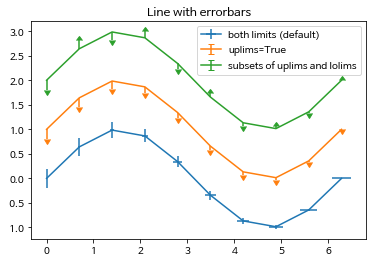

In [ ]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xerr = np.linspace(0, 1, 10) / 5
yerr = np.linspace(1, 0, 10) / 5

plt.errorbar(x, y, yerr, xerr, 
             label = 'both limits (default)')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, 
             label='uplims=True')

plt.errorbar(x, y + 2, yerr=yerr, uplims=[True, False] * 5, lolims=[False, True] * 5, 
             label='subsets of uplims and lolims')

plt.title('Line with errorbars')
plt.legend()
plt.show()